In [1]:
pip install numpy pandas opencv-python scikit-learn matplotlib tqdm

Note: you may need to restart the kernel to use updated packages.


In [2]:
import os

# Correct path using raw string
folder_path = r"C:\Users\DELL\Downloads\archive (12)"

# List all files in the folder
for root, dirs, files in os.walk(folder_path):
    for file in files:
        print(file)


0.jpg
1.jpg
10.jpg
100.jpg
1000.jpg
10000.jpg
10001.jpg
10002.jpg
10003.jpg
10004.jpg
10005.jpg
10006.jpg
10007.jpg
10008.jpg
10009.jpg
1001.jpg
10010.jpg
10011.jpg
10012.jpg
10013.jpg
10014.jpg
10015.jpg
10016.jpg
10017.jpg
10018.jpg
10019.jpg
1002.jpg
10020.jpg
10021.jpg
10022.jpg
10023.jpg
10024.jpg
10025.jpg
10026.jpg
10027.jpg
10028.jpg
10029.jpg
1003.jpg
10030.jpg
10031.jpg
10032.jpg
10033.jpg
10034.jpg
10035.jpg
10036.jpg
10037.jpg
10038.jpg
10039.jpg
1004.jpg
10040.jpg
10041.jpg
10042.jpg
10043.jpg
10044.jpg
10045.jpg
10046.jpg
10047.jpg
10048.jpg
10049.jpg
1005.jpg
10050.jpg
10051.jpg
10052.jpg
10053.jpg
10054.jpg
10055.jpg
10056.jpg
10057.jpg
10058.jpg
10059.jpg
1006.jpg
10060.jpg
10061.jpg
10062.jpg
10063.jpg
10064.jpg
10065.jpg
10066.jpg
10067.jpg
10068.jpg
10069.jpg
1007.jpg
10070.jpg
10071.jpg
10072.jpg
10073.jpg
10074.jpg
10075.jpg
10076.jpg
10077.jpg
10078.jpg
10079.jpg
1008.jpg
10080.jpg
10081.jpg
10082.jpg
10083.jpg
10084.jpg
10085.jpg
10086.jpg
10087.jpg
10088.jpg
10

In [3]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from tqdm import tqdm


In [4]:
# Change this to your dataset folder containing images
data_dir = r"C:\Users\DELL\Downloads\archive (12)"  # Adjust as needed

img_size = 64  # Resize images to 64x64 for faster processing
limit = 2000   # Number of images to load (reduce if memory is an issue)


In [5]:
X = []
y = []

print("Loading images and labels...")

for i, img_name in enumerate(tqdm(os.listdir(data_dir))):
    if img_name.endswith(".jpg"):
        # Extract label from filename
        if "cat" in img_name.lower():
            label = 0
        elif "dog" in img_name.lower():
            label = 1
        else:
            # Skip if label not found in filename
            continue
        
        img_path = os.path.join(data_dir, img_name)
        img = cv2.imread(img_path)
        if img is None:
            continue
        
        # Resize and convert to grayscale
        img = cv2.resize(img, (img_size, img_size))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        
        X.append(img.flatten())  # Flatten to 1D vector
        y.append(label)

        if i >= limit - 1:
            break

X = np.array(X)
y = np.array(y)

print(f"Loaded {len(X)} images.")


Loading images and labels...


100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 949.58it/s]

Loaded 0 images.


In [6]:
print(f"Number of images loaded: {len(X)}")
print(f"Number of labels loaded: {len(y)}")

if len(X) == 0:
    print("No images loaded! Please check your dataset path and image files.")


Number of images loaded: 0
Number of labels loaded: 0
No images loaded! Please check your dataset path and image files.


In [7]:
import os

data_dir = r"C:\Users\DELL\Downloads\archive (12)"

files = os.listdir(data_dir)
print(f"Total files in dataset folder: {len(files)}")
print("Sample files:", files[:10])


Total files in dataset folder: 1
Sample files: ['PetImages']


In [8]:
import os

data_dir = r"C:\Users\DELL\Downloads\archive (12)\PetImages"

print("Contents of PetImages folder:")
print(os.listdir(data_dir))


Contents of PetImages folder:
['Cat', 'Dog']


In [9]:
import os
import cv2
import numpy as np
from tqdm import tqdm

data_dir = r"C:\Users\DELL\Downloads\archive (12)\PetImages"
img_size = 64
limit_per_class = 1000  # You can adjust this

X = []
y = []

# Class folders and corresponding labels
classes = {'Cat': 0, 'Dog': 1}

for class_name, label in classes.items():
    class_path = os.path.join(data_dir, class_name)
    images = os.listdir(class_path)
    print(f"Loading {len(images)} images from {class_name} folder")
    for i, img_name in enumerate(tqdm(images[:limit_per_class])):
        img_path = os.path.join(class_path, img_name)
        img = cv2.imread(img_path)
        if img is None:
            # Sometimes some images might be corrupted, skip those
            continue
        img = cv2.resize(img, (img_size, img_size))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        X.append(img.flatten())
        y.append(label)

X = np.array(X)
y = np.array(y)

print(f"Total images loaded: {len(X)}")


Loading 12499 images from Cat folder


100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 512.90it/s]


Loading 12499 images from Dog folder


100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 436.42it/s]

Total images loaded: 1999


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train the SVM classifier
print("Training SVM...")
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train, y_train)

# Predict on test set
y_pred = svm.predict(X_test)

# Evaluate
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Cat', 'Dog']))


Training SVM...
Accuracy: 0.47

Classification Report:
              precision    recall  f1-score   support

         Cat       0.49      0.55      0.52       207
         Dog       0.45      0.40      0.42       193

    accuracy                           0.47       400
   macro avg       0.47      0.47      0.47       400
weighted avg       0.47      0.47      0.47       400



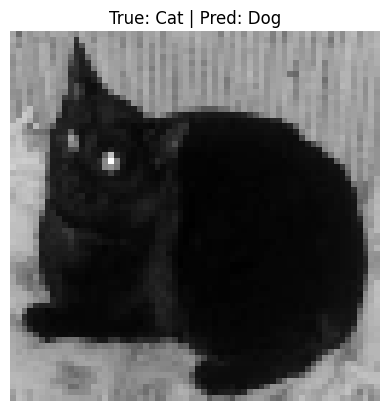

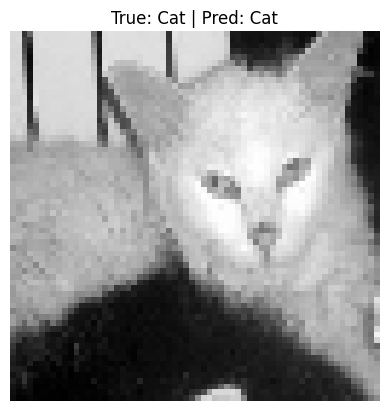

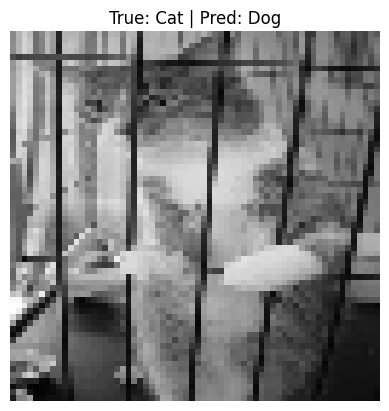

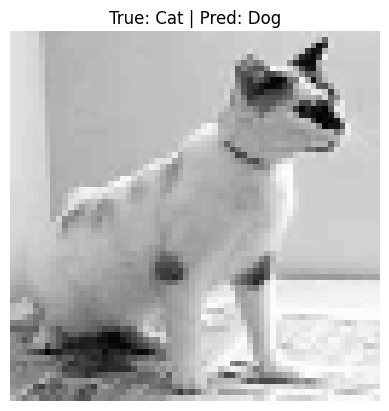

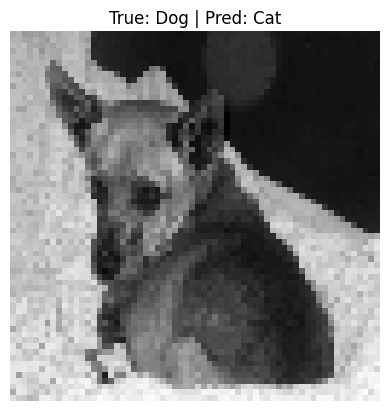

In [11]:
def plot_samples(X_test, y_test, y_pred, img_size, num=5):
    for i in range(num):
        img = X_test[i].reshape(img_size, img_size)
        true_label = 'Dog' if y_test[i] == 1 else 'Cat'
        pred_label = 'Dog' if y_pred[i] == 1 else 'Cat'

        plt.imshow(img, cmap='gray')
        plt.title(f"True: {true_label} | Pred: {pred_label}")
        plt.axis('off')
        plt.show()

plot_samples(X_test, y_test, y_pred, img_size)
